In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_path = "C:/Users/Anusha/Documents/Copied on 9_26_19/Fall 2019/Data Science/Project/GoogleMeetUpdated.csv"
data = pd.read_csv(data_path)

Exracting Google Meet Total call minutes related metrics

In [157]:
Callmin = data[["google.meet:total_call_minutes","time","date","year","month"]].rename(columns = {"google.meet:total_call_minutes": "TotalCallMinutes"}) 
Callmin.head(10)

,TotalCallMinutes,time,date,year,month
0,0.0,2018-01-14T00:00:00.000-0500,2018-01-14,2018,1
1,0.0,2018-01-15T00:00:00.000-0500,2018-01-15,2018,1
2,0.0,2018-01-16T00:00:00.000-0500,2018-01-16,2018,1
3,0.0,2018-01-17T00:00:00.000-0500,2018-01-17,2018,1
4,0.0,2018-01-18T00:00:00.000-0500,2018-01-18,2018,1
5,0.0,2018-01-19T00:00:00.000-0500,2018-01-19,2018,1
6,0.0,2018-01-20T00:00:00.000-0500,2018-01-20,2018,1
7,0.0,2018-01-21T00:00:00.000-0500,2018-01-21,2018,1
8,0.0,2018-01-22T00:00:00.000-0500,2018-01-22,2018,1
9,0.0,2018-01-23T00:00:00.000-0500,2018-01-23,2018,1


Shape Of Data

In [158]:
Callmin.shape

(543, 5)

Value counts is used to find the number of observations with metric value as 0,1,..
There are 155 observations with metric value as 0

In [159]:
counts = Callmin.TotalCallMinutes.value_counts()
counts.head(10)

0.0       155
2299.0      2
478.0       2
468.0       2
1631.0      2
883.0       2
1871.0      2
555.0       2
112.0       2
369.0       2
Name: TotalCallMinutes, dtype: int64

Finding number of negative metric_values using mask. There are no negative values

In [160]:
mask = (Callmin.TotalCallMinutes< 0)
Callmin[mask].head()

,TotalCallMinutes,time,date,year,month


Sorting using metric values in ascending order.

In [161]:
Callmin.TotalCallMinutes.sort_values().head(10)

0      0.0
101    0.0
102    0.0
103    0.0
104    0.0
106    0.0
107    0.0
108    0.0
109    0.0
110    0.0
Name: TotalCallMinutes, dtype: float64

describe is used to get some useful information like number of metric values and least, highest metric value

In [162]:
Callmin.TotalCallMinutes.describe()

count     541.000000
mean     1152.295749
std      1309.325413
min         0.000000
25%         0.000000
50%       782.000000
75%      1861.000000
max      7623.000000
Name: TotalCallMinutes, dtype: float64

Maximum number of total_call_minutes

In [163]:
Callmin.loc[Callmin.TotalCallMinutes.idxmax()]

TotalCallMinutes                            7623
time                2019-07-01T00:00:00.000-0400
date                                  2019-07-01
year                                        2019
month                                          7
Name: 497, dtype: object

Minimun value in dataframe

In [164]:
Callmin.loc[Callmin.TotalCallMinutes.idxmin()]

TotalCallMinutes                               0
time                2018-01-14T00:00:00.000-0500
date                                  2018-01-14
year                                        2018
month                                          1
Name: 0, dtype: object

In [165]:
Callmin.groupby(['TotalCallMinutes', 'date' , 'time' , 'year','month']).count().tail(10)

,,,,
TotalCallMinutes,date,time,year,month
5175.0,2018-10-03,2018-10-03T00:00:00.000-0400,2018,10
5257.0,2019-03-12,2019-03-12T00:00:00.000-0400,2019,3
5308.0,2019-02-13,2019-02-13T00:00:00.000-0500,2019,2
5472.0,2019-08-07,2019-08-07T00:00:00.000-0400,2019,8
5562.0,2018-12-10,2018-12-10T00:00:00.000-0500,2018,12
5617.0,2019-02-12,2019-02-12T00:00:00.000-0500,2019,2
5708.0,2019-03-26,2019-03-26T00:00:00.000-0400,2019,3
7274.0,2019-03-27,2019-03-27T00:00:00.000-0400,2019,3
7297.0,2018-12-11,2018-12-11T00:00:00.000-0500,2018,12


Number of observations for each year

In [168]:
Callmin.year.value_counts()

2018    328
2019    215
Name: year, dtype: int64

Number of observations for each year

In [169]:
Callmin.month.value_counts()

4     60
3     60
6     54
5     54
2     53
7     51
1     49
8     41
12    31
10    31
11    30
9     29
Name: month, dtype: int64

In [170]:
Callmin['TotalCallMinutes'].quantile(0)

0.0

Median of metric values

In [171]:
Callmin['TotalCallMinutes'].quantile(0.5)

782.0

Highest Metric values are around 7623

In [172]:
Callmin['TotalCallMinutes'].quantile(1.0)

7623.0

Mean value is far away from median as we have extreme values for total call minutes for few days.
Eg: There are 7623 minutes on 2019-07-01

In [173]:
Callmin['TotalCallMinutes'].mean()

1152.2957486136784

Mode of metric values. Total call minutes are zero for most of the days

In [174]:
Callmin['TotalCallMinutes'].mode()

0    0.0
dtype: float64

Quartile

minimum value (0th percentile),
first quartile (25th percentile),
the median - second quartile (50th percentile),
third quartile(75th percentile), and
maximum value (100th percentile)
using the quantile() function:

In [175]:
five_num = [Callmin['TotalCallMinutes'].quantile(0),   
            Callmin['TotalCallMinutes'].quantile(0.25),
            Callmin['TotalCallMinutes'].quantile(0.50),
            Callmin['TotalCallMinutes'].quantile(0.75),
            Callmin['TotalCallMinutes'].quantile(1)]

five_num

[0.0, 0.0, 782.0, 1861.0, 7623.0]

Interquartile (IQR) range - distance between the 3rd quartile and the 1st quartile

In [176]:
Callmin['TotalCallMinutes'].quantile(0.75) - Callmin['TotalCallMinutes'].quantile(0.25)

1861.0

Plotted all quartile values which are calculated above using box plots

We can see the highest values, there are around 12 values greater than 4400 

Text(0.7, 1861, 'IQR')

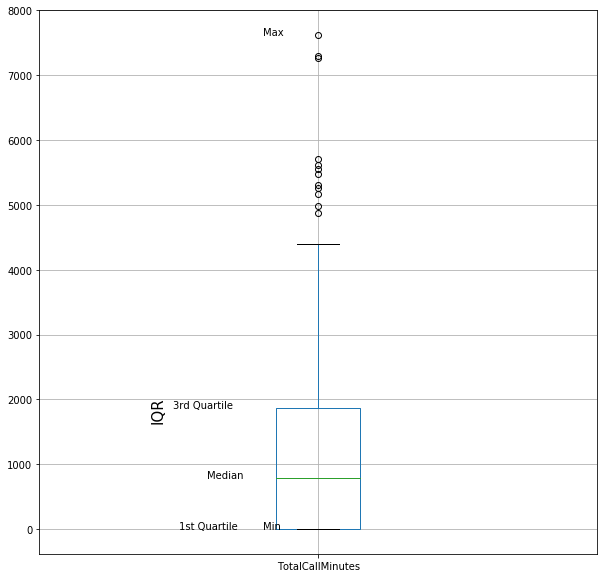

In [177]:
from matplotlib.figure import Figure
Callmin.boxplot(column="TotalCallMinutes",
               return_type='axes',
               figsize=(10,10))

plt.text(x=0.74, y=1861, s="3rd Quartile")
plt.text(x=0.8, y=782, s="Median")
plt.text(x=0.75, y=0, s="1st Quartile")
plt.text(x=0.9, y=0, s="Min")
plt.text(x=0.9, y=7623, s="Max")
plt.text(x=0.7, y=1861, s="IQR", rotation=90, size=15)

The variance of a distribution is the average of the squared deviations (differences) from the mean.

In [178]:
Callmin['TotalCallMinutes'].var()

1714333.0382967067

Standard Deviation - square root of the variance.

In [179]:
Callmin['TotalCallMinutes'].std()

1309.325413446446

Variance and Standard Deviation are not the right measures of spread as our data is having extreme values. So, they are susceptible to the influence of data skew and outliers as both of them are derived from the mean.

Median absolute deviation is an alternative measure of spread based on the median, which inherits the median's robustness against the influence of skew and outliers. It is the median of the absolute value of the deviations from the median

Median absolute deviation is the right measure of spread for TotalCallMinutes metric

In [180]:
abs_median_devs = abs(Callmin['TotalCallMinutes']- Callmin['TotalCallMinutes'].median())

abs_median_devs.median() * 1.4826

1159.3932